> > > **DATA loan.csv**

## Import the important library for this da##ta set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , accuracy_score  , classification_report
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')

## load the dataset

In [2]:
data = pd.read_csv("C:/Users/RAJEEV PRAJAPAT/Desktop/python/1_assinmgment/dataset/loan.csv")
data.head()


,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


## ***EDA***

### Perform the basic  methods to understand the dataset
> dtypes,
> info ,etc.


In [3]:
data.dtypes

age                 int64
gender             object
occupation         object
education_level    object
marital_status     object
income              int64
credit_score        int64
loan_status        object
dtype: object

In [4]:
data.isnull().sum()

age                0
gender             0
occupation         0
education_level    0
marital_status     0
income             0
credit_score       0
loan_status        0
dtype: int64

> No null values are in the dataset 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


> 61 Rows and 8 columns

In [6]:
data.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [7]:
data.duplicated().sum()

np.int64(0)

> No duplicated values are in the dataset

## Perform the some basic visulaization on the dataset
"" TO understand the pattern and trends in the dataset""

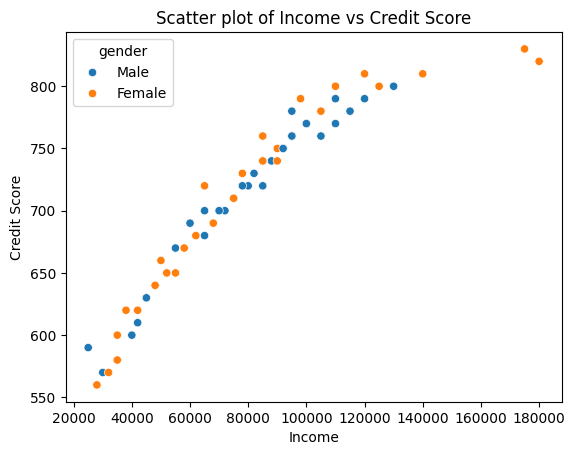

Description: This scatter plot shows the relationship between income and credit score for the individuals in the dataset.


In [8]:
# Scatter plot of income vs credit score
sns.scatterplot(x="income", y="credit_score",hue="gender", data=data)
plt.title('Scatter plot of Income vs Credit Score')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.show()
print("Description: This scatter plot shows the relationship between income and credit score for the individuals in the dataset.")

<Figure size 1000x600 with 0 Axes>

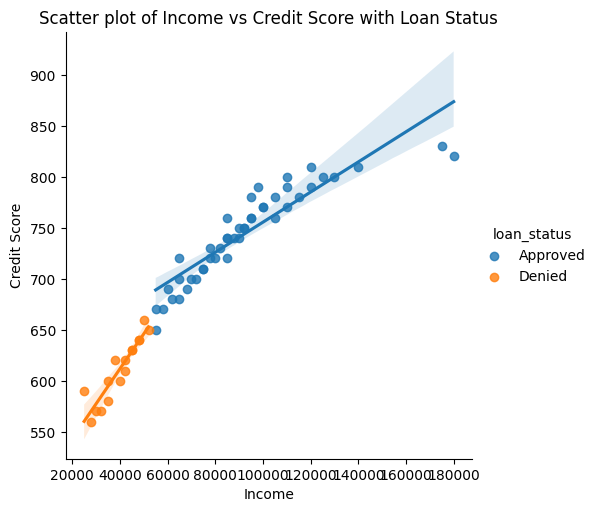

Description: This scatter plot shows the relationship between income and credit score, with different colors representing the loan status (Approved or Denied).


In [9]:
# Scatter plot of income vs credit score with loan status hue
plt.figure(figsize=(10, 6))
sns.lmplot(x="income", y="credit_score", data=data, hue="loan_status")
plt.title('Scatter plot of Income vs Credit Score with Loan Status')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.show()
print("Description: This scatter plot shows the relationship between income and credit score, with different colors representing the loan status (Approved or Denied).")

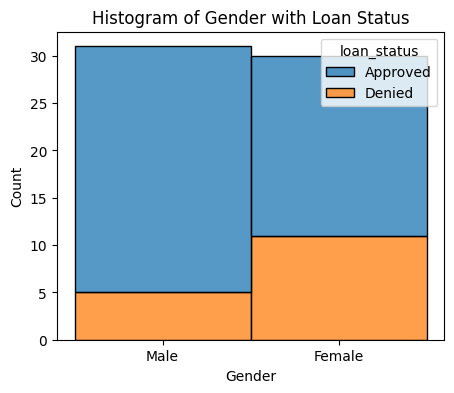

Description: This histogram shows the distribution of gender in the dataset, with different colors representing the loan status (Approved or Denied).


In [10]:
# Histogram of gender with loan status hue
plt.figure(figsize=(5, 4))
sns.histplot(x="gender", data=data, hue="loan_status", multiple="stack")
plt.title('Histogram of Gender with Loan Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
print("Description: This histogram shows the distribution of gender in the dataset, with different colors representing the loan status (Approved or Denied).")


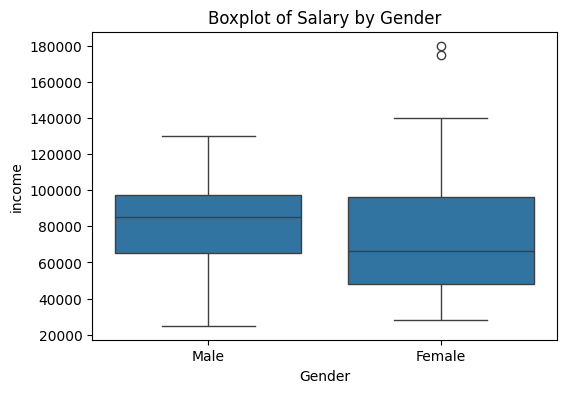

Description: This boxplot shows the distribution of salary by gender in the dataset. , to see the outliers


In [11]:
# Create the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='gender', y='income', data=data)
plt.title('Boxplot of Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('income')
plt.show()
print("Description: This boxplot shows the distribution of salary by gender in the dataset. , to see the outliers")

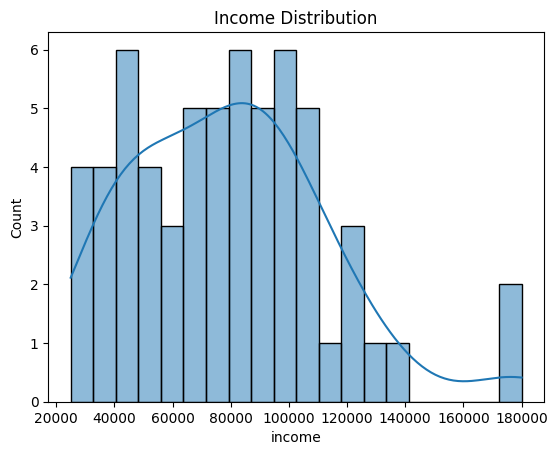

In [12]:
# Distribution of income
sns.histplot(data['income'], bins=20, kde=True)
plt.title("Income Distribution")
plt.show()



> data was normal distribution 

In [13]:
data.columns

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

## separate dataset on the basis of the categorical and numerical columns

In [14]:
cat = data.select_dtypes(include=['object'])
num = data.select_dtypes(include=['int64', 'float64'])
print("Categorical columns: ", cat.columns)
print("Numerical columns: ", num.columns)

Categorical columns:  Index(['gender', 'occupation', 'education_level', 'marital_status',
       'loan_status'],
      dtype='object')
Numerical columns:  Index(['age', 'income', 'credit_score'], dtype='object')


### decode the categorical columns using Labelencoding

In [15]:
le = LabelEncoder()
for l in cat:
    data[l] = le.fit_transform(data[l])
data.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,1,12,1,0,85000,720,0
1,45,0,35,4,1,62000,680,0
2,28,1,33,3,1,25000,590,1
3,51,0,16,1,0,105000,780,0
4,36,1,0,1,0,75000,710,0


# Define the Standard scaling function - Standardization

In [16]:
def scaler_standard(X_train, X_test):

    scaler = StandardScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the test data
    X_test_scaled = scaler.transform(X_test)
    
    # Save the scaler model to a pickle file
    try:
        with open('C:/Users/RAJEEV PRAJAPAT/Desktop/python/1_ASSINMGMENT/model/standerScaler.pkl', 'wb') as f:
            pickle.dump(scaler, f)
        print("Pickle file 'standerScaler.pkl' has been successfully created.")
    except Exception as e:
        print(f"An error occurred while saving the pickle file: {e}")
        
    # return
    return X_train_scaled, X_test_scaled


<Axes: >

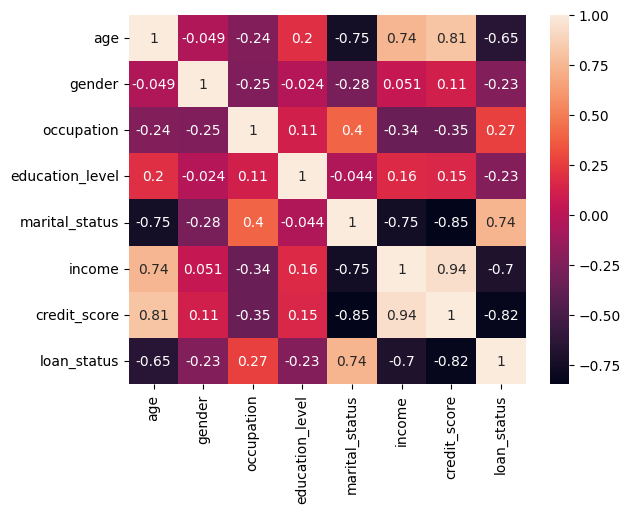

In [17]:
corr = data.corr()
sns.heatmap(corr, annot=True, )  

### After analysis the graph should be drop the columns which are not important for the model building dependent variables is: * loan_status *
    - AGE : -0.65 (negative corr)
    - Gender : 0.23 (postive corr) @ not important 
    - occupation :0.12 (null corr)  @ not important
    - education_level : 0.03 (null corr) @ not important
    - marital_status : -0.74 (negative corr)
    - income : -0.70 (negative corr)
    - credit_score : -0.82 (negative corr)    
> very high correlation score between income and credit_score : 0.94 , ' so we can drop any one column'

### drop columns

In [18]:
data.drop('education_level',axis=1,inplace=True)
data.drop('occupation',axis=1,inplace=True)

### separate the independent and dependent variable

In [19]:
X = data.drop('loan_status',axis=1)
y = data['loan_status']
print(X.columns)


Index(['age', 'gender', 'marital_status', 'income', 'credit_score'], dtype='object')


## train_test_spilt method

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25, random_state=42)

> funtion call

In [21]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

Pickle file 'standerScaler.pkl' has been successfully created.


## model development

> 1. **logistic regression**

In [24]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
y_pred = log_reg.predict(X_test_scaled)

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9375

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16


Confusion Matrix:
 [[11  1]
 [ 0  4]]


> **logistic regression by Hyper parameter tunning**


In [26]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'penalty' : ['l1' ,'l2'] ,
    'C' :np.logspace(-3,3,7),
    'solver' :['newton-cg' , 'lbfgs' , 'liblinear'],
}


In [27]:
logreg = LogisticRegression()
clf = GridSearchCV(logreg,               ## model
                   param_grid=parameters ## hyperparameter
                   ,scoring='accuracy'   ## meterics of scoring
                   , cv=10)              ## numbers of folds

clf.fit(X_train_scaled , y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [28]:
clf.best_params_

{'C': np.float64(1.0), 'penalty': 'l1', 'solver': 'liblinear'}

In [29]:
clf.best_score_

np.float64(0.9800000000000001)

In [30]:
y_pred = clf.predict(X_test_scaled)

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9375

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16


Confusion Matrix:
 [[11  1]
 [ 0  4]]


> 2. **Random Forest classifier**


In [32]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
random_pred = model.predict(X_test_scaled)

In [33]:
print("random forest Accuracy:", accuracy_score(y_test, random_pred))
print("\nClassification Report:\n", classification_report(y_test, random_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, random_pred))


random forest Accuracy: 0.9375

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16


Confusion Matrix:
 [[11  1]
 [ 0  4]]


> 3. **K-Means clustering** 

In [34]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled, y_train)
kmeans_pred = kmeans.predict(X_test_scaled)

In [35]:
print("K-Means Accuracy:", accuracy_score(y_test, kmeans_pred))
print("\nClassification Report:\n", classification_report(y_test, kmeans_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, kmeans_pred))


K-Means Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.67      1.00      0.80         4

    accuracy                           0.88        16
   macro avg       0.83      0.92      0.85        16
weighted avg       0.92      0.88      0.88        16


Confusion Matrix:
 [[10  2]
 [ 0  4]]


> 4. **SVC(support vector machine)**

In [36]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

In [37]:
print("SVC Accuracy:", accuracy_score(y_test, svm_pred))
print("\nClassification Report:\n", classification_report(y_test,svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,svm_pred))

SVC Accuracy: 0.9375

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.90      0.96      0.92        16
weighted avg       0.95      0.94      0.94        16


Confusion Matrix:
 [[11  1]
 [ 0  4]]


> 5. **Decision Tree**

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

Decision Tree Accuracy: 1.0


In [39]:
print("Decision tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\nClassification Report:\n", classification_report(y_test, dt_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_pred))

Decision tree Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         4

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Confusion Matrix:
 [[12  0]
 [ 0  4]]


> 

> 6. **Naive Bayes**

In [40]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_pred = nb.predict(X_test_scaled)

In [41]:
print("K-Means Accuracy:", accuracy_score(y_test, nb_pred))
print("\nClassification Report:\n", classification_report(y_test, nb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, nb_pred))

K-Means Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.67      1.00      0.80         4

    accuracy                           0.88        16
   macro avg       0.83      0.92      0.85        16
weighted avg       0.92      0.88      0.88        16


Confusion Matrix:
 [[10  2]
 [ 0  4]]


> 7. **K-nearest neighbors**

In [42]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

In [43]:
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, knn_pred))

KNN Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.67      1.00      0.80         4

    accuracy                           0.88        16
   macro avg       0.83      0.92      0.85        16
weighted avg       0.92      0.88      0.88        16


Confusion Matrix:
 [[10  2]
 [ 0  4]]


In [44]:
# Save the randomforest model to a pickle file
try:
    with open('C:/Users/RAJEEV PRAJAPAT/Desktop/python/1_assinmgment/model/modelForPrediction.pkl', 'wb') as f:
        pickle.dump(clf, f)
    print("Pickle file 'modelForPrediction.pkl' has been successfully created.")
except Exception as e:
    print(f"An error occurred while saving the pickle file: {e}")


Pickle file 'modelForPrediction.pkl' has been successfully created.


## completion
>Model has been trained and saved successfully.

- The dataset has been cleaned and preprocessed, including handling missing values, encoding categorical variables, and scaling numerical variables.

- The dataset has been split into training and testing sets with a test size of 25%.

- Logistic Regression, Random Forest, K-Means Clustering, Support Vector Machine, Decision Tree, Naive Bayes, and K-Nearest Neighbors have been evaluated using accuracy, precision, recall, and F1-score metrics.

- The model with the highest accuracy score is Random Forest classifier, with an accuracy score of approximately **93%**
- The model can now be used to predict loan status based on the provided features.
- The model has been saved to a pickle file named 'modelForPrediction.pkl'. This file can be used to load the trained model and make predictions on new data.


> > >Model is ready to develop or hosting 